In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Reviews.csv")

In [3]:
d = {1:0,2:0,3:1,4:2,5:2}

df["Label"] = df["Score"].apply(lambda x :d[x])

In [4]:
df["Label"].value_counts()

Label
2    443777
0     82037
1     42640
Name: count, dtype: int64

In [5]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Label
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2
...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,2
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,0
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",2
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
 10  Label                   568454 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 47.7+ MB


In [7]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Label
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05,568454.000000
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09,1.636358
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07,0.721138
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08,0.000000
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09,2.000000
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09,2.000000
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09,2.000000
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09,2.000000


In [8]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
Label                      0
dtype: int64

In [9]:
df["Score"].value_counts()

Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64

In [10]:
df["Text"][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [11]:
df["Summary"][0]

'Good Quality Dog Food'

In [12]:
df= df.dropna()

In [13]:
df.reset_index(inplace=True)

In [14]:
df = df.drop(["index"],axis=1)

In [15]:
duplicate_rows = df[df.duplicated()]
print('Number of duplicate tweets : ',len(duplicate_rows))

Number of duplicate tweets :  0


## Text Preprocessing

In [16]:
!pip install bs4

In [17]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [19]:
from bs4 import BeautifulSoup
def preprocessed(review): 
    sentance = re.sub(r"http\S+", "", review)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords.words('english'))
    return sentance.strip()

In [20]:
print("Review : ",df["Text"][0],"\n")
print("Preprocessed Review : ",preprocessed(df["Text"][0]))

Review :  I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most. 

Preprocessed Review :  bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better


In [21]:
print("Summary : ",df["Summary"][0],"\n")
print("Preprocessed Summary : ",preprocessed(df["Summary"][0]))

Summary :  Good Quality Dog Food 

Preprocessed Summary :  good quality dog food


In [22]:
from tqdm.notebook import tqdm
tqdm.pandas()

In [23]:
df = df.sample(20000)

df.reset_index(inplace=True)

In [24]:
df["Preprocessed Review"] = df["Text"].progress_apply(lambda x : preprocessed(x))

  0%|          | 0/20000 [00:00<?, ?it/s]

/tmp/ipykernel_26/3334880588.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  sentance = BeautifulSoup(sentance, 'lxml').get_text()


In [25]:
from tqdm import tqdm
l = []
for x in tqdm(df["Preprocessed Review"]) :
    l.append(len(x.split()))

100%|██████████| 20000/20000 [00:00<00:00, 263099.38it/s]


In [26]:
df["Review_length"] = l

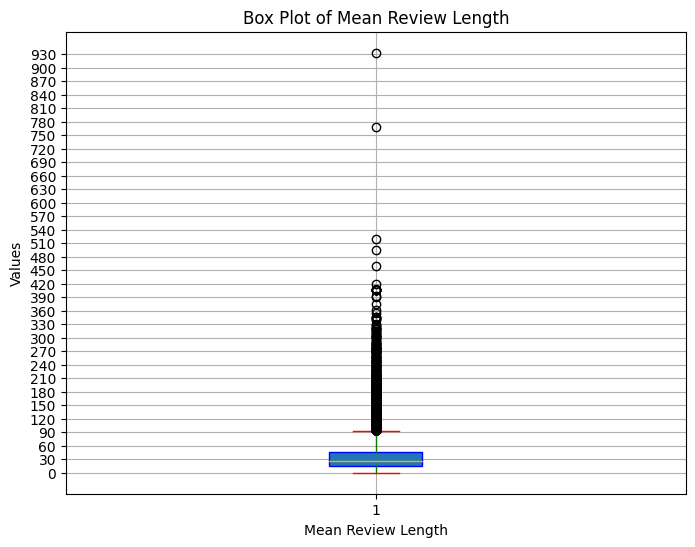

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df["Review_length"] contains the review lengths
data = df["Review_length"]

plt.figure(figsize=(8, 6))  # Adjust size as needed

# Customizing box plot colors
boxprops = dict(color="blue")
whiskerprops = dict(color="green")
capprops = dict(color="red")
medianprops = dict(color="orange")

plt.boxplot(data, vert=True, patch_artist=True,
            boxprops=boxprops, whiskerprops=whiskerprops,
            capprops=capprops, medianprops=medianprops)

plt.title("Box Plot of Mean Review Length")
plt.xlabel("Mean Review Length")
plt.ylabel("Values")
plt.grid(True)

# Set y-axis ticks in increments of 10
plt.yticks(np.arange(0, max(data) + 20, 30))

plt.show()


In [28]:
df["Review_length"].mean()

38.6706

In [29]:
df["Score"].value_counts()

Score
5    12733
4     2829
1     1840
3     1513
2     1085
Name: count, dtype: int64

In [30]:
d = {1:0,2:0,3:1,4:2,5:2}

df["Label"] = df["Score"].apply(lambda x :d[x])

In [31]:
df["Label"].value_counts()

Label
2    15562
0     2925
1     1513
Name: count, dtype: int64

In [32]:

labels = df['Label'].values
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df["Preprocessed Review"],labels, test_size=0.2, random_state=None)


In [33]:
max_len = 40
trunc_type = "post"
padding_type = "pre"
oov_tok = "<OOV>"

In [34]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2024-03-28 06:02:01.534065: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-28 06:02:01.534172: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-28 06:02:01.695226: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [35]:
token = Tokenizer( char_level=False, oov_token = oov_tok) # oov_token is used for out of vocabulary
token.fit_on_texts(X_train)

In [36]:
vocab_size = len(token.word_index)+1 

In [37]:
x_train_seq = token.texts_to_sequences(X_train)
train_pad_seq = pad_sequences (x_train_seq, maxlen = max_len, padding = padding_type, truncating = trunc_type )
x_test_seq = token.texts_to_sequences(X_test)
test_pad_seq = pad_sequences(x_test_seq, maxlen = max_len,padding = padding_type, truncating = trunc_type)

In [38]:
print('Shape of training reviews: ', train_pad_seq.shape)
print('Shape of testing reviews: ', test_pad_seq.shape)

Shape of training reviews:  (16000, 40)
Shape of testing reviews:  (4000, 40)


In [39]:
print('Actual Review:\n',X_train.iloc[5])
print('\ntweet sentence represented in terms of tokens and not padded :\n ',x_train_seq[5])
print('\nAfter padding : \n',train_pad_seq[5])

Actual Review:
 looks smells great son really like texture much lumpier products requires lot chewing seems bit dry

tweet sentence represented in terms of tokens and not padded :
  [479, 480, 6, 337, 15, 2, 180, 16, 13946, 110, 2076, 75, 772, 226, 59, 169]

After padding : 
 [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
   479   480     6   337    15     2   180    16 13946   110  2076    75
   772   226    59   169]


In [40]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional
from sklearn.metrics import classification_report

In [41]:
num_epochs = 5

In [42]:
n_lstm=128
embeding_dim =128
drop_lstm =0.2
model = Sequential()
model.add(Embedding(vocab_size, embeding_dim))
model.add(LSTM(n_lstm, dropout=drop_lstm,return_sequences=False))

model.add(Dense(3, activation='softmax'))
# model.summary()

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

history = model.fit(train_pad_seq,Y_train, epochs=num_epochs,validation_data=(test_pad_seq, Y_test), verbose=2)

Epoch 1/5
500/500 - 28s - 55ms/step - accuracy: 0.8052 - loss: 0.5525 - val_accuracy: 0.8360 - val_loss: 0.4618
Epoch 2/5
500/500 - 23s - 47ms/step - accuracy: 0.8708 - loss: 0.3561 - val_accuracy: 0.8372 - val_loss: 0.4632
Epoch 3/5
500/500 - 23s - 46ms/step - accuracy: 0.9191 - loss: 0.2282 - val_accuracy: 0.8280 - val_loss: 0.5788
Epoch 4/5
500/500 - 23s - 46ms/step - accuracy: 0.9518 - loss: 0.1432 - val_accuracy: 0.8177 - val_loss: 0.6594
Epoch 5/5
500/500 - 41s - 82ms/step - accuracy: 0.9725 - loss: 0.0848 - val_accuracy: 0.8217 - val_loss: 0.7782


Training Results
              precision    recall  f1-score   support

           0     0.9822    0.9751    0.9786      2371
           1     0.9826    0.9309    0.9560      1215
           2     0.9917    0.9981    0.9949     12414

    accuracy                         0.9896     16000
   macro avg     0.9855    0.9680    0.9765     16000
weighted avg     0.9896    0.9896    0.9895     16000



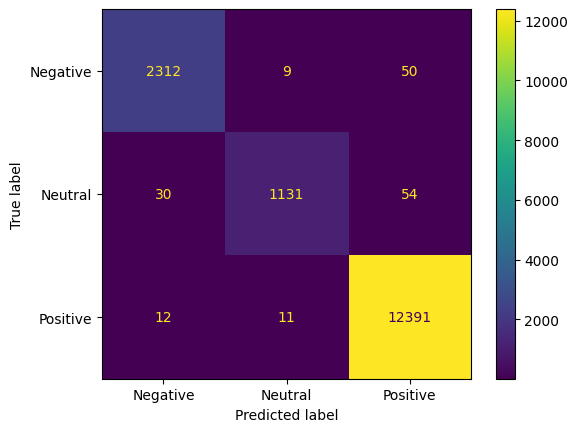

Testing Results
              precision    recall  f1-score   support

           0     0.6220    0.5523    0.5851       554
           1     0.3052    0.2181    0.2544       298
           2     0.8850    0.9263    0.9052      3148

    accuracy                         0.8217      4000
   macro avg     0.6040    0.5656    0.5816      4000
weighted avg     0.8054    0.8217    0.8124      4000



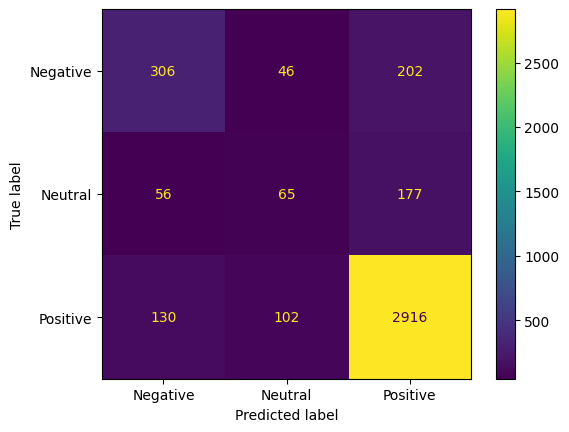

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print("Training Results")
yhat_probs = model.predict(train_pad_seq, verbose=0)
pred =  np.argmax(yhat_probs, axis=1)
matrix = classification_report(Y_train, pred,digits =4)
print(matrix)

cm = confusion_matrix(Y_train, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Negative","Neutral","Positive"])
disp.plot()
plt.show()

print("Testing Results")
yhat_probs = model.predict(test_pad_seq, verbose=0)
pred =  np.argmax(yhat_probs, axis=1)
matrix = classification_report(Y_test, pred,digits =4)
print(matrix)

cm = confusion_matrix(Y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Negative","Neutral","Positive"])
disp.plot()
plt.show()


## BI-LSTM

In [44]:
n_lstm=128
embeding_dim =128
drop_lstm =0.2
model2 = Sequential()
model2.add(Embedding(vocab_size, embeding_dim))
model2.add(Bidirectional(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True)))
model2.add(Bidirectional(LSTM(n_lstm, dropout=drop_lstm)))

model2.add(Dense(3, activation='softmax'))
# model.summary()

model2.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

history = model2.fit(train_pad_seq,Y_train, epochs=num_epochs,validation_data=(test_pad_seq, Y_test), verbose=2)

Epoch 1/5
500/500 - 64s - 129ms/step - accuracy: 0.8080 - loss: 0.5418 - val_accuracy: 0.8217 - val_loss: 0.4857
Epoch 2/5
500/500 - 81s - 162ms/step - accuracy: 0.8702 - loss: 0.3586 - val_accuracy: 0.8428 - val_loss: 0.4705
Epoch 3/5
500/500 - 59s - 118ms/step - accuracy: 0.9168 - loss: 0.2324 - val_accuracy: 0.8275 - val_loss: 0.5479
Epoch 4/5
500/500 - 82s - 163ms/step - accuracy: 0.9529 - loss: 0.1367 - val_accuracy: 0.8173 - val_loss: 0.6667
Epoch 5/5
500/500 - 82s - 164ms/step - accuracy: 0.9728 - loss: 0.0850 - val_accuracy: 0.8085 - val_loss: 0.7458


Training Results
              precision    recall  f1-score   support

           0     0.9646    0.9878    0.9760      2371
           1     0.9716    0.9309    0.9508      1215
           2     0.9951    0.9946    0.9948     12414

    accuracy                         0.9888     16000
   macro avg     0.9771    0.9711    0.9739     16000
weighted avg     0.9888    0.9888    0.9887     16000



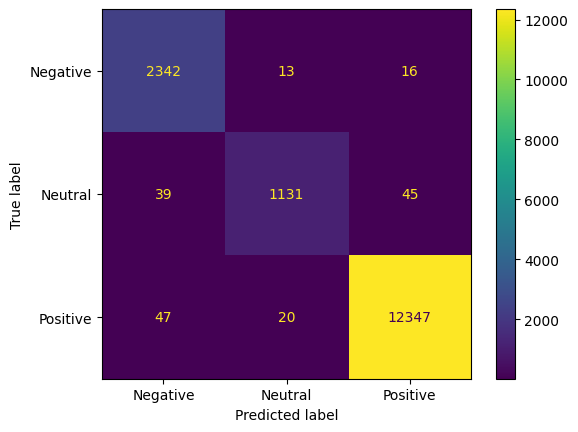

Testing Results
              precision    recall  f1-score   support

           0     0.5436    0.6300    0.5836       554
           1     0.2833    0.2215    0.2486       298
           2     0.9021    0.8955    0.8988      3148

    accuracy                         0.8085      4000
   macro avg     0.5763    0.5823    0.5770      4000
weighted avg     0.8063    0.8085    0.8067      4000



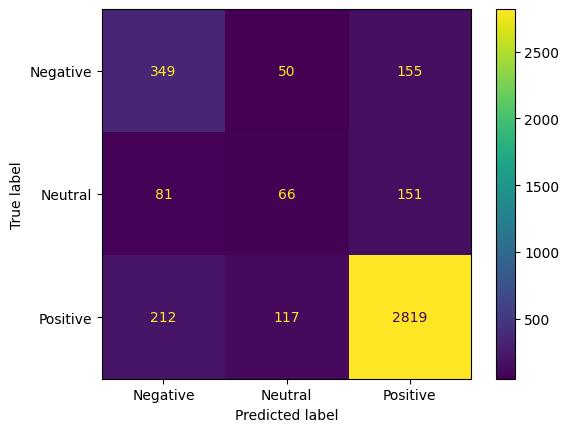

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print("Training Results")
yhat_probs = model2.predict(train_pad_seq, verbose=0)
pred =  np.argmax(yhat_probs, axis=1)
matrix = classification_report(Y_train, pred,digits =4)
print(matrix)

cm = confusion_matrix(Y_train, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Negative","Neutral","Positive"])
disp.plot()
plt.show()

print("Testing Results")
yhat_probs = model2.predict(test_pad_seq, verbose=0)
pred =  np.argmax(yhat_probs, axis=1)
matrix = classification_report(Y_test, pred,digits =4)
print(matrix)

cm = confusion_matrix(Y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Negative","Neutral","Positive"])
disp.plot()
plt.show()

### CNN

In [46]:
from tensorflow.keras.layers import Conv1D,MaxPooling1D

n_lstm=128
embeding_dim =128
drop_lstm =0.2

model3 = Sequential()
model3.add(Embedding(vocab_size, embeding_dim))
model3.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model3.add(MaxPooling1D(pool_size=2))
model3.add(tf.keras.layers.Flatten())
model3.add(Dense(1024, activation='relu'))
model3.add(Dense(3, activation='softmax'))


model3.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

history = model3.fit(train_pad_seq,Y_train, epochs=num_epochs,validation_data=(test_pad_seq, Y_test), verbose=2)

Epoch 1/5


I0000 00:00:1711606279.327128      84 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1711606279.343382      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


500/500 - 6s - 12ms/step - accuracy: 0.8091 - loss: 0.5337 - val_accuracy: 0.8372 - val_loss: 0.4740
Epoch 2/5


W0000 00:00:1711606281.049933      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


500/500 - 2s - 3ms/step - accuracy: 0.8979 - loss: 0.2734 - val_accuracy: 0.8213 - val_loss: 0.5321
Epoch 3/5
500/500 - 1s - 3ms/step - accuracy: 0.9833 - loss: 0.0540 - val_accuracy: 0.8250 - val_loss: 0.8047
Epoch 4/5
500/500 - 1s - 3ms/step - accuracy: 0.9987 - loss: 0.0067 - val_accuracy: 0.8282 - val_loss: 0.9929
Epoch 5/5
500/500 - 1s - 3ms/step - accuracy: 0.9990 - loss: 0.0033 - val_accuracy: 0.8282 - val_loss: 1.1119


Training Results


W0000 00:00:1711606287.410937      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


              precision    recall  f1-score   support

           0     1.0000    0.9979    0.9989      2371
           1     1.0000    0.9959    0.9979      1215
           2     0.9992    1.0000    0.9996     12414

    accuracy                         0.9994     16000
   macro avg     0.9997    0.9979    0.9988     16000
weighted avg     0.9994    0.9994    0.9994     16000



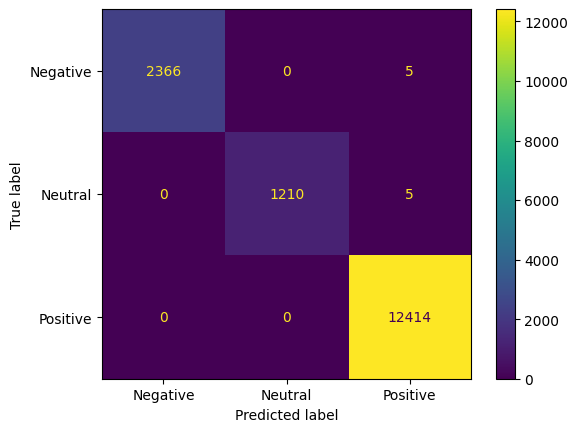

Testing Results
              precision    recall  f1-score   support

           0     0.6455    0.5325    0.5836       554
           1     0.2671    0.1443    0.1874       298
           2     0.8797    0.9450    0.9112      3148

    accuracy                         0.8283      4000
   macro avg     0.5974    0.5406    0.5607      4000
weighted avg     0.8016    0.8283    0.8119      4000



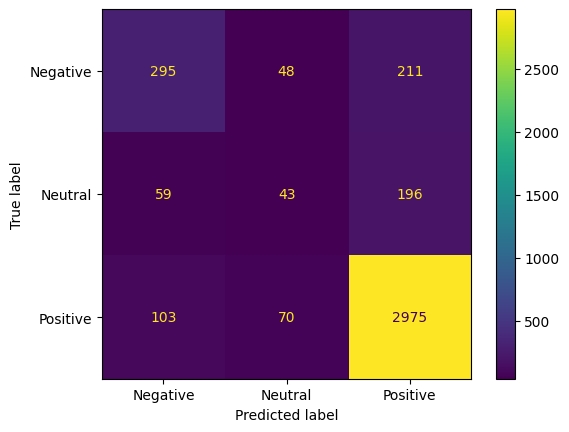

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print("Training Results")
yhat_probs = model3.predict(train_pad_seq, verbose=0)
pred =  np.argmax(yhat_probs, axis=1)
matrix = classification_report(Y_train, pred,digits =4)
print(matrix)

cm = confusion_matrix(Y_train, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Negative","Neutral","Positive"])
disp.plot()
plt.show()

print("Testing Results")
yhat_probs = model3.predict(test_pad_seq, verbose=0)
pred =  np.argmax(yhat_probs, axis=1)
matrix = classification_report(Y_test, pred,digits =4)
print(matrix)

cm = confusion_matrix(Y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Negative","Neutral","Positive"])
disp.plot()
plt.show()

### CNN + LSTM

In [48]:
from tensorflow.keras.layers import Conv1D,MaxPooling1D

n_lstm=128
embeding_dim =128
drop_lstm =0.2

model4 = Sequential()
model4.add(Embedding(vocab_size, embeding_dim))
model4.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model4.add(MaxPooling1D(pool_size=2))
model4.add(LSTM(n_lstm, dropout=drop_lstm))
model4.add(Dense(3, activation='softmax'))


model4.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

history = model4.fit(train_pad_seq,Y_train, epochs=num_epochs,validation_data=(test_pad_seq, Y_test), verbose=2)

Epoch 1/5
500/500 - 16s - 33ms/step - accuracy: 0.7999 - loss: 0.5560 - val_accuracy: 0.8397 - val_loss: 0.4553
Epoch 2/5
500/500 - 13s - 26ms/step - accuracy: 0.8612 - loss: 0.3831 - val_accuracy: 0.8388 - val_loss: 0.4649
Epoch 3/5
500/500 - 13s - 26ms/step - accuracy: 0.8953 - loss: 0.2766 - val_accuracy: 0.8330 - val_loss: 0.5058
Epoch 4/5
500/500 - 13s - 27ms/step - accuracy: 0.9313 - loss: 0.1839 - val_accuracy: 0.8142 - val_loss: 0.6322
Epoch 5/5
500/500 - 20s - 41ms/step - accuracy: 0.9596 - loss: 0.1178 - val_accuracy: 0.8040 - val_loss: 0.7980


Training Results
              precision    recall  f1-score   support

           0     0.9660    0.9814    0.9736      2371
           1     0.9553    0.8609    0.9056      1215
           2     0.9906    0.9972    0.9939     12414

    accuracy                         0.9845     16000
   macro avg     0.9706    0.9465    0.9577     16000
weighted avg     0.9843    0.9845    0.9842     16000



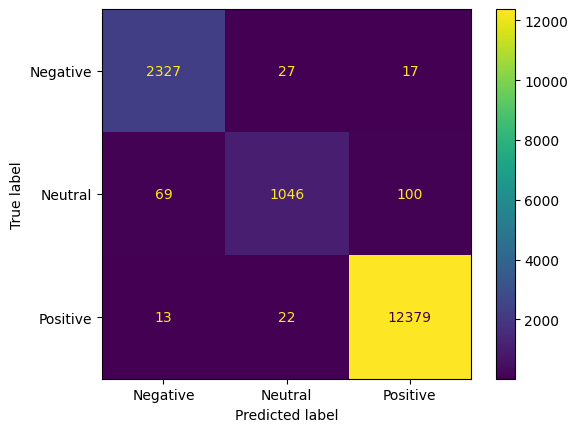

Testing Results
              precision    recall  f1-score   support

           0     0.5803    0.5740    0.5771       554
           1     0.2125    0.1946    0.2032       298
           2     0.8934    0.9022    0.8977      3148

    accuracy                         0.8040      4000
   macro avg     0.5620    0.5569    0.5593      4000
weighted avg     0.7993    0.8040    0.8016      4000



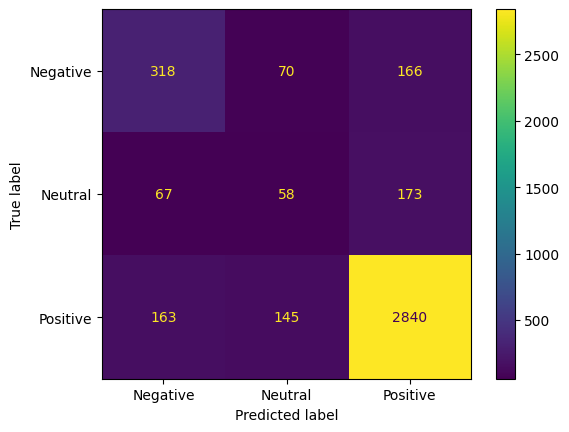

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print("Training Results")
yhat_probs = model4.predict(train_pad_seq, verbose=0)
pred =  np.argmax(yhat_probs, axis=1)
matrix = classification_report(Y_train, pred,digits =4)
print(matrix)

cm = confusion_matrix(Y_train, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Negative","Neutral","Positive"])
disp.plot()
plt.show()

print("Testing Results")
yhat_probs = model4.predict(test_pad_seq, verbose=0)
pred =  np.argmax(yhat_probs, axis=1)
matrix = classification_report(Y_test, pred,digits =4)
print(matrix)

cm = confusion_matrix(Y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Negative","Neutral","Positive"])
disp.plot()
plt.show()
